# Exploratory Data Analysis of Engineered Features

Observations:
* Moderate to weak visual correlations between engineered features and targets
* Score of first assessment looks to have a sigificant collelation with estimated final score, final outcome
* Individual distributions show a lot of 0 values, unsurprising otherwise

In [23]:
import numpy as np 
import pandas as pd
import seaborn as sns
sns.reset_defaults
sns.set_style(style='whitegrid')
sns.set_context(context='poster')
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
font = {'size'   : 16}
plt.rc('font', **font)
plt.ion()
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True
plt.rcParams["figure.figsize"] = (20.0, 10.0)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 2000)# reg_df = pd.read_csv('../data/raw/studentRegistration.csv')
# reg_df = pd.read_csv('../data/raw/studentRegistration.csv')

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, confusion_matrix, recall_score, roc_auc_score, roc_curve, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV

In [40]:
def scale_subset(df, columns):
    '''
    Use sklearn StandardScalar to scale only numeric columns.

    Parameters:
    ----------
    input {dataframe, list}: dataframe containing mixed feature variable types, list of names of numeric feature columns
    output: {dataframe}: dataframe with numeric features scaled and categorical features unchanged

    '''
    scalar = StandardScaler()
    numeric = df[columns]
    categorical = df.drop(columns, axis = 1)
    scalar.fit(numeric)
    num_scaled = pd.DataFrame(scalar.transform(numeric))
    num_scaled.rename(columns = dict(zip(num_scaled.columns, numeric_cols)), inplace = True)
    return pd.concat([num_scaled, categorical], axis = 1)

In [24]:
df = pd.read_csv('../data/processed/transformed_data_with_features.csv')

In [25]:
df = df.fillna(value=0)

In [26]:
df.shape

(32630, 62)

In [27]:
df = df[df['date_unregistration'] >= 0]

## Single vs Double Modules

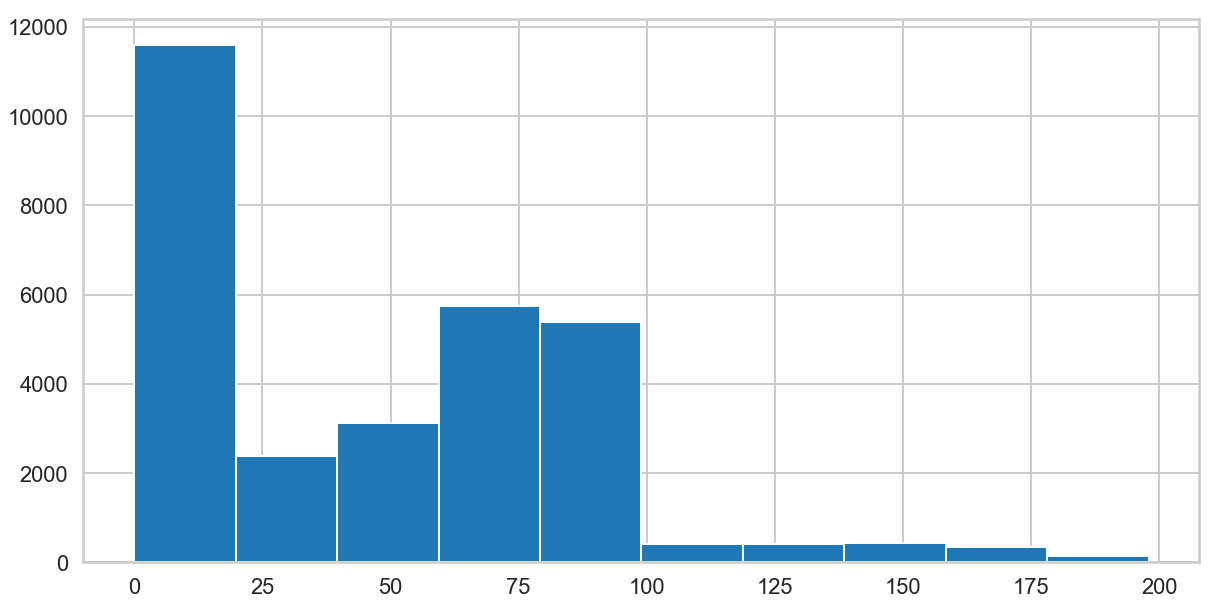

In [28]:
plt.hist(df['estimated_final_score'])
plt.show()

In [30]:
df['score_above_100'] = df['estimated_final_score'] > 100

In [37]:
X = df.drop(['id_student', 'date_unregistration', 'module_not_completed', 'score_above_100'], axis =1)
y = df['score_above_100']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [43]:
numeric_cols = ['num_of_prev_attempts', 'studied_credits', 'clicks_per_day', 'pct_days_vle_accessed','max_clicks_one_day','first_date_vle_accessed', 'avg_score', 'avg_days_sub_early','days_early_first_assessment', 'score_first_assessment']

In [45]:
    X_train.fillna(value = 0, inplace = True)
    y_train.fillna(value = 0, inplace = True)
    X_train = scale_subset(X_train, numeric_cols)
    X_test.fillna(value = 0, inplace = True)
    y_test.fillna(value = 0, inplace = True)
    X_test = scale_subset(X_test, numeric_cols)

/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


In [ ]:
df.columns

In [ ]:
df.shape

In [ ]:
df[(df['date_unregistration'].isnull())].shape

In [ ]:
df.fillna(value=0, inplace=True)

In [ ]:
df.corr()

In [ ]:
df.columns

## Engineered Feature Analysis

### Bivariate Plots Against Targets: final_result_num, estimated_final_score

In [ ]:
sns.jointplot(x='clicks_per_day', y='final_result_num', data=df, size=12, alpha=0.2)

In [ ]:
sns.jointplot(x='clicks_per_day', y='estimated_final_score', data=df, size=12, alpha=0.2)

In [ ]:
sns.jointplot(x='pct_days_vle_accessed', y='final_result_num', data=df, size=12, alpha=0.2)

In [ ]:
sns.jointplot(x='pct_days_vle_accessed', y='estimated_final_score', data=df, size=12, alpha=0.2)

In [ ]:
sns.jointplot(x='studied_credits', y='final_result_num', data=df, size=12, alpha=0.2)

In [ ]:
sns.jointplot(x='studied_credits', y='estimated_final_score', data=df, size=12, alpha=0.2)

In [ ]:
df.columns

In [ ]:
sns.jointplot(x='max_clicks_one_day', y='final_result_num', data=df, size=12, alpha=0.5)

In [ ]:
sns.jointplot(x='max_clicks_one_day', y='estimated_final_score', data=df, size=12, alpha=0.2)

In [ ]:
sns.jointplot(x='first_date_vle_accessed', y='final_result_num', data=df, size=12, alpha=0.2)

In [ ]:
sns.jointplot(x='first_date_vle_accessed', y='estimated_final_score', data=df, size=12, alpha=0.2)

In [ ]:
sns.jointplot(x='avg_days_sub_early', y='final_result_num', data=df, size=12, alpha=0.2)

In [ ]:
sns.jointplot(x='avg_days_sub_early', y='estimated_final_score', data=df, size=12, alpha=0.2)

In [ ]:
df.columns

In [ ]:
sns.jointplot(x='days_early_first_assessment', y='final_result_num', data=df, size=12, alpha=0.2)

In [ ]:
sns.jointplot(x='days_early_first_assessment', y='estimated_final_score', data=df, size=12, alpha=0.2)

In [ ]:
sns.jointplot(x='score_first_assessment', y='final_result_num', data=df, size=12, alpha=0.2)

In [ ]:
sns.jointplot(x='score_first_assessment', y='estimated_final_score', data=df, size=12, alpha=0.2)

In [ ]:
sns.jointplot(x='avg_score', y='final_result_num', data=df, size=12, alpha=0.2)

In [ ]:
sns.jointplot(x='avg_score', y='estimated_final_score', data=df, size=12, alpha=0.1)

### Univariate Plots of Engineered Features

In [ ]:
df.columns

In [ ]:
f = list(df.columns[[1,2,4,6,7,8,9,10,11,12,13,14,15,16]])

In [ ]:
for feat in f:
    plt.figure(figsize=(12,12))
    sns.distplot(df[feat], bins=50, kde=False)